----- Order -----
14
6
3
----- Poles -----
[ -2366.42505361+21002.60324887j  -6980.6127273 +19949.44502273j
 -11244.76333034+17895.93832153j -14945.05454596+14945.05454596j
 -17895.93832153+11244.76333034j -19949.44502273 +6980.6127273j
 -21002.60324887 +2366.42505361j -21002.60324887 -2366.42505361j
 -19949.44502273 -6980.6127273j  -17895.93832153-11244.76333034j
 -14945.05454596-14945.05454596j -11244.76333034-17895.93832153j
  -6980.6127273 -19949.44502273j  -2366.42505361-21002.60324887j]
[ -973.9666768 +20355.17719611j -2660.92644588+14901.02390462j
 -3634.89312268 +5454.15329149j -3634.89312268 -5454.15329149j
 -2660.92644588-14901.02390462j  -973.9666768 -20355.17719611j]
[-10418.01732586    +0.j          -2318.54302285-20157.44550666j
  -2318.54302285+20157.44550666j]
----- Zeroes -----
[]
[]
[0.+27238.49734367j 0.-27238.49734367j]


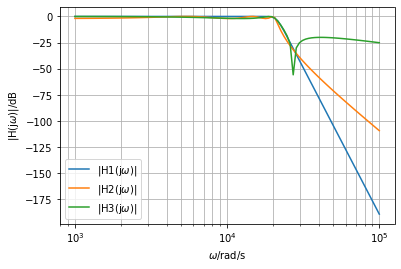

In [7]:
## Task 1a)
import soundfile as sf
import sounddevice as sd

import numpy as np
import matplotlib. pyplot as plt
from scipy import signal

#constants
pi = np.pi

## Edge frequencies
wp = 2*pi*3.3*10**3
ws = 2*pi*4*10**3

#Attentuation
Ap = 2
As = 20

#### 1a) i.
N1, wn1 = signal.buttord(wp, ws, Ap, As, analog=True)
N2, wn2 = signal.cheb1ord(wp, ws, Ap, As, analog=True)
N3, wn3 = signal.ellipord(wp, ws, Ap, As, analog=True)

#order, and normalization frequency??
print('----- Order -----')
print(N1)
print(N2)
print(N3)

#### 1a) ii.
z1, p1, k1 = signal.butter(N1, wn1, analog=True, output='zpk')
z2, p2, k2 = signal.cheby1(N2, Ap, wn2, analog=True, output='zpk')
z3, p3, k3 = signal.ellip(N3, Ap, As, wn3, analog=True, output='zpk')

print('----- Poles -----')
print(p1)
print(p2)
print(p3)

print('----- Zeroes -----')
print(z1)
print(z2)
print(z3)


H1 = signal.ZerosPolesGain(z1, p1, k1)
H2 = signal.ZerosPolesGain(z2, p2, k2)
H3 = signal.ZerosPolesGain(z3, p3, k3)

## Task 2a)
w1, magnitude1, phase1 = signal.bode(H1)
w2, magnitude2, phase2 = signal.bode(H2)
w3, magnitude3, phase3 = signal.bode(H3)

# Create a new figure
fig, ax = plt.subplots()
ax.semilogx()

####plot
#magnitude

ax.plot(w1, magnitude1, label='|H1(j$\omega$)|')
ax.plot(w2, magnitude2, label='|H2(j$\omega$)|')
ax.plot(w3, magnitude3, label='|H3(j$\omega$)|')

ax.set_xlabel('$\omega$/rad/s')
ax.set_ylabel('|H(j$\omega$)|/dB')

#phase
#ax.plot(w1, phase1, label='phase H1(j$\omega$)')
#ax.plot(w2, phase2, label='phase H2(j$\omega$)')
#ax.plot(w3, phase3, label='phase H3(j$\omega$)')

#ax.set_xlabel('$\omega$/rad/s')
#ax.set_ylabel('phase H(j$\omega$)/$/deg$')


ax.legend()
ax.grid(which='both')
#ax.set_xlim(10**4, 10**5)
#ax.set_ylim(-60, 5)

#fig.savefig('figure_task_1b_mag')


In [5]:
## Task 2
import soundfile as sf
import sounddevice as sd

import numpy as np
import matplotlib. pyplot as plt
from scipy import signal

x, fs = sf.read('pipes.wav')
Ts = 1/fs

N = x.shape[0]
t = np.arange(0, N*Ts, Ts)

y = np.zeros((N, 2))
ty = np.zeros((N, 2))

iCh0 = 0
iCh1 = 1


ty[:, iCh0], y[:, iCh0], _ = signal.lsim(H3, x[:, iCh0], t)
ty[:, iCh1], y[:, iCh1], _ = signal.lsim(H3, x[:, iCh1], t)

#sd.play(x, fs)
sd.wait()
sd.play(y, fs)
sd.wait()


